# Loading LiPDverse Data and Plotting as GeoSeries
This notebook demonstrates how to load datasets directly from the LiPDverse and create a Pyleoclim GeoSeries.

In [1]:
from pylipd.lipd import LiPD
import pyleoclim as pyleo

In [3]:
url = 'https://linkedearth.graphdb.mint.isi.edu/repositories/LiPDVerse-dynamic' # version this to avoid breaking changes (5?)

In [5]:
# Connect to the LiPDverse endpoint
lipd = LiPD()
lipd.set_endpoint(url)

In [13]:
# Specify dataset IDs from the LiPDverse
dsids = ['WAISDivide.Cuffey.2016']  # replace or extend as desired
lipd.load_remote_datasets(dsids)

# Retrieve time series objects for the first dataset
ts_list_sub, df2 = lipd.get_timeseries(dsids, to_dataframe=True)
df2.columns

Caching datasets from remote endpoint..
Making remote query to endpoint: https://linkedearth.graphdb.mint.isi.edu/repositories/LiPDVerse-dynamic
Done..
Extracting timeseries from dataset: WAISDivide.Cuffey.2016 ...


Index(['mode', 'time_id', 'archiveType', 'geo_meanLon', 'geo_meanLat',
       'geo_meanElev', 'geo_type', 'geo_siteName', 'geo_gcmdLocation',
       'geo_countryOcean', 'geo_location', 'pub1_author', 'pub1_citeKey',
       'pub1_doi', 'pub1_dataUrl', 'pub1_issue', 'pub1_publisher',
       'pub1_journal', 'pub1_pages', 'pub1_title', 'pub1_volume', 'pub1_year',
       'pub1_page', 'pub2_author', 'pub2_doi', 'pub2_dataUrl', 'pub2_issue',
       'pub2_publisher', 'pub2_journal', 'pub2_pages', 'pub2_title',
       'pub2_volume', 'pub2_year', 'datasetId', 'dataSetName',
       'originalDataURL', 'hasUrl', 'maxYear', 'createdBy', 'minYear',
       'lipdverseLink', 'changelog', 'agesPerKyr', 'lipdVersion',
       'lipdComplete', 'tableType', 'paleoData_filename',
       'paleoData_missingValue', 'paleoData_tableName', 'age', 'ageUnits',
       'paleoData_resolution_hasMaxValue', 'paleoData_resolution_hasMeanValue',
       'paleoData_resolution_hasMedianValue',
       'paleoData_resolution_hasM

In [25]:
gs_list = []
for _, row in df2.iterrows():
    # Create a GeoSeries using Pyleoclim
    geo = pyleo.GeoSeries(
        time=row["age"],
        value=row["paleoData_values"],
        lat=row["geo_meanLat"],
        lon=row["geo_meanLon"],
        time_name=row["time_id"],
        value_name=row["paleoData_variableName"],
        time_unit=row["ageUnits"],
        value_unit=row["paleoData_units"],
        archiveType = row['archiveType'],
        label=f"{row['dataSetName']}_{row['paleoData_variableName']}"
    )
    gs_list.append(geo)


Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [yr BP]', ylabel='temperature [degC]'>)

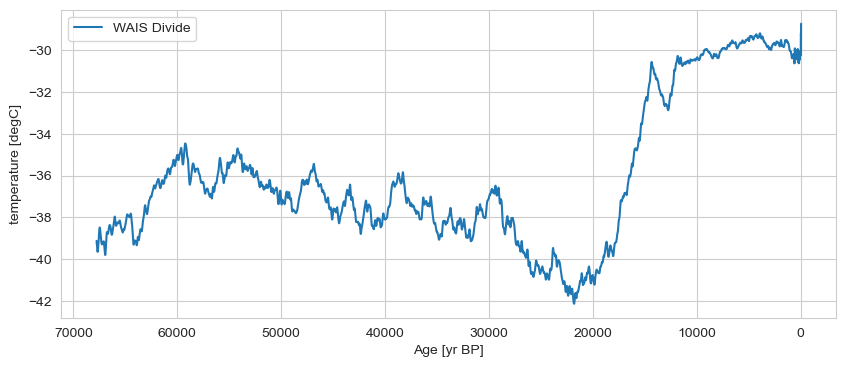

In [29]:
gs_list[0].plot(invert_xaxis=True, label='WAIS Divide')

In [35]:
import joblib
import os
from pathlib import Path
# Save the GeoSeries to a file
data_path = Path(os.getcwd()).parent.parent / 'data'
file_path = joblib.dump(gs_list, data_path/'lipdverse_data.joblib')